In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
plt.style.use('default')
import sklearn 
import imblearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, precision_recall_fscore_support, roc_auc_score

In [2]:
fraud_detection = pd.read_csv('creditcard.csv')
fraud_detection.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Tratar valores ausentes
fraud_detection.fillna(fraud_detection.mean(), inplace=True)

In [4]:
# Normalizando os dados
fraud_detection[["Time", "Amount"]] = (fraud_detection[["Time", "Amount"]] - fraud_detection[["Time", "Amount"]].mean()) / fraud_detection[["Time", "Amount"]].std()

In [5]:
fraud_detection.shape

(284807, 31)

In [6]:
# Checagem das colunas
fraud_detection.columns[:-1].values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount'], dtype=object)

In [7]:
fraud_detection.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,-1.149614e-16,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,2.308662e-13,0.001727
std,1.000000e+00,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000000e+00,0.041527
min,-1.996580e+00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532288e-01,0.000000
25%,-8.552105e-01,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308395e-01,0.000000
50%,-2.131450e-01,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652710e-01,0.000000
75%,9.372158e-01,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471699e-02,0.000000
max,1.642055e+00,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023621e+02,1.000000


## Balanceamento do conjunto de dados: Como o conjunto de dados é desbalanceado, é importante equilibrá-lo antes de realizar a seleção de características. Vamos usar o método de oversampling para aumentar o número de exemplos da classe minoritária.

In [8]:
from sklearn.utils import resample
fraud = fraud_detection[fraud_detection['Class'] == 1]
not_fraud = fraud_detection[fraud_detection['Class'] == 0]

In [9]:
# Oversampling da classe minoritária
fraud_upsampled = resample(fraud,
                           replace=True, #amostras com reposição
                           n_samples=len(not_fraud), #igual ao número de amostras da classe majoritária
                           random_state=42)

#concatenaçao os exemplos da classe majoritária com os exemplos da classe minoritária oversampled
df_balanced = pd.concat([not_fraud, fraud_upsampled])

In [10]:
df_balanced.shape

(568630, 31)

## Calcular a importância das características: Vamos usar o método de árvore de decisão para calcular a importância das características.

In [11]:
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

In [12]:
#instanciar o classificador da árvore de decisão
tree_clf = DecisionTreeClassifier(random_state=42)

tree_clf.fit(X, y)

#calculando a importância das características
importances = tree_clf.feature_importances_

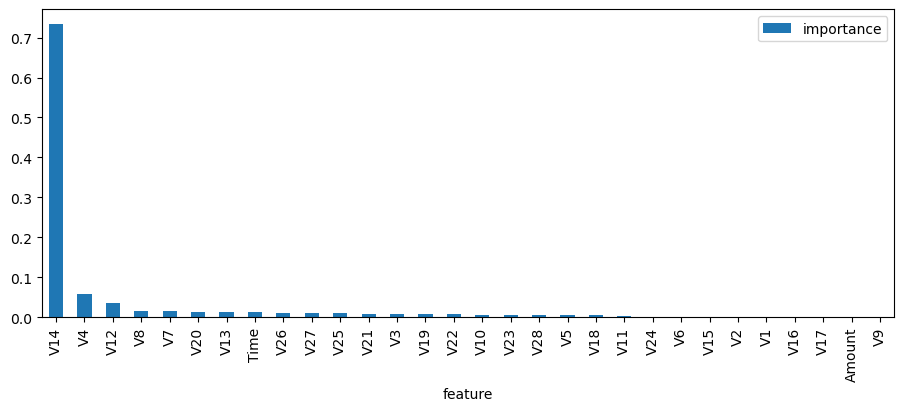

In [13]:
importances_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

importances_df = importances_df.sort_values('importance', ascending=False).set_index('feature')

plt.rcParams['figure.figsize'] = (11, 4)
importances_df.plot.bar();

##  Selecionar as características: Vamos selecionar as características com as maiores importâncias.

In [14]:
#selecionar as características com as maiores importâncias
selected_features = X.columns[importances > 0.01]

#criação de um novo conjunto de dados apenas com as características selecionadas
X_selected = X[selected_features]

In [15]:
X_selected

,Time,V4,V7,V8,V12,V13,V14,V20,V25,V26,V27
0,-1.996580,1.378155,0.239599,0.098698,-0.617801,-0.991390,-0.311169,0.251412,0.128539,-0.189115,0.133558
1,-1.996580,0.448154,-0.078803,0.085102,1.065235,0.489095,-0.143772,-0.069083,0.167170,0.125895,-0.008983
2,-1.996558,0.379780,0.791461,0.247676,0.066084,0.717293,-0.165946,0.524980,-0.327642,-0.139097,-0.055353
3,-1.996558,-0.863291,0.237609,0.377436,0.178228,0.507757,-0.287924,-0.208038,0.647376,-0.221929,0.062723
4,-1.996537,0.403034,0.592941,-0.270533,0.538196,1.345852,-1.119670,0.408542,-0.206010,0.502292,0.219422
...,...,...,...,...,...,...,...,...,...,...,...
229712,1.078335,6.009415,-1.819308,0.338527,-6.151362,-1.989529,-9.150951,0.241921,0.465058,0.210510,0.648705
15781,-1.423405,6.349248,-17.971212,16.633103,-6.699252,0.846768,-6.576276,1.658289,1.768192,-0.219916,1.411855
251881,1.278806,4.173516,0.572731,-0.131235,0.144622,0.104088,-2.954167,-0.172216,-0.114958,-0.240672,-0.006629
154234,0.128667,9.584969,-33.239328,-21.560039,-10.895134,-1.523452,0.116303,5.804551,-1.608804,-0.459624,-4.626127


In [16]:
# Converter o array numpy de volta em um dataframe pandas
X_selected = pd.DataFrame(X_selected, columns=selected_features)

In [17]:
X_selected = X_selected.reset_index(drop=True)

In [18]:
X_selected

,Time,V4,V7,V8,V12,V13,V14,V20,V25,V26,V27
0,-1.996580,1.378155,0.239599,0.098698,-0.617801,-0.991390,-0.311169,0.251412,0.128539,-0.189115,0.133558
1,-1.996580,0.448154,-0.078803,0.085102,1.065235,0.489095,-0.143772,-0.069083,0.167170,0.125895,-0.008983
2,-1.996558,0.379780,0.791461,0.247676,0.066084,0.717293,-0.165946,0.524980,-0.327642,-0.139097,-0.055353
3,-1.996558,-0.863291,0.237609,0.377436,0.178228,0.507757,-0.287924,-0.208038,0.647376,-0.221929,0.062723
4,-1.996537,0.403034,0.592941,-0.270533,0.538196,1.345852,-1.119670,0.408542,-0.206010,0.502292,0.219422
...,...,...,...,...,...,...,...,...,...,...,...
568625,1.078335,6.009415,-1.819308,0.338527,-6.151362,-1.989529,-9.150951,0.241921,0.465058,0.210510,0.648705
568626,-1.423405,6.349248,-17.971212,16.633103,-6.699252,0.846768,-6.576276,1.658289,1.768192,-0.219916,1.411855
568627,1.278806,4.173516,0.572731,-0.131235,0.144622,0.104088,-2.954167,-0.172216,-0.114958,-0.240672,-0.006629
568628,0.128667,9.584969,-33.239328,-21.560039,-10.895134,-1.523452,0.116303,5.804551,-1.608804,-0.459624,-4.626127


In [19]:
y.shape

(568630,)

In [20]:
# Converter a série y em DataFrame
y_df = pd.DataFrame(y, columns=["Class"])

In [21]:
y_df

,Class
0,0
1,0
2,0
3,0
4,0
...,...
229712,1
15781,1
251881,1
154234,1


In [22]:
y_df = y_df.reset_index(drop=True)

In [23]:
y_df

,Class
0,0
1,0
2,0
3,0
4,0
...,...
568625,1
568626,1
568627,1
568628,1


## new data é o novo dataframe com os X(features) importantes selecionados e y ( a classe)

In [24]:
# Concatenar os DataFrames X_selected e y_df
new_data = pd.concat([X_selected, y_df], axis=1)

In [25]:
new_data

,Time,V4,V7,V8,V12,V13,V14,V20,V25,V26,V27,Class
0,-1.996580,1.378155,0.239599,0.098698,-0.617801,-0.991390,-0.311169,0.251412,0.128539,-0.189115,0.133558,0
1,-1.996580,0.448154,-0.078803,0.085102,1.065235,0.489095,-0.143772,-0.069083,0.167170,0.125895,-0.008983,0
2,-1.996558,0.379780,0.791461,0.247676,0.066084,0.717293,-0.165946,0.524980,-0.327642,-0.139097,-0.055353,0
3,-1.996558,-0.863291,0.237609,0.377436,0.178228,0.507757,-0.287924,-0.208038,0.647376,-0.221929,0.062723,0
4,-1.996537,0.403034,0.592941,-0.270533,0.538196,1.345852,-1.119670,0.408542,-0.206010,0.502292,0.219422,0
...,...,...,...,...,...,...,...,...,...,...,...,...
568625,1.078335,6.009415,-1.819308,0.338527,-6.151362,-1.989529,-9.150951,0.241921,0.465058,0.210510,0.648705,1
568626,-1.423405,6.349248,-17.971212,16.633103,-6.699252,0.846768,-6.576276,1.658289,1.768192,-0.219916,1.411855,1
568627,1.278806,4.173516,0.572731,-0.131235,0.144622,0.104088,-2.954167,-0.172216,-0.114958,-0.240672,-0.006629,1
568628,0.128667,9.584969,-33.239328,-21.560039,-10.895134,-1.523452,0.116303,5.804551,-1.608804,-0.459624,-4.626127,1


## Treinar e avaliar o modelo:

## Aplicação dos modelos de ML dos trabalhos relacionados de classificação:
#### Seleção de modelos:
* Regressão Logística
* Árvore de Decisão
* KNeighborsClassifier
* SVM (retiramos pelo fato de demorar demais)
* Random Forest.
* XG Boost


#### Divisão dos dados

In [26]:
# Dividir os dados em features e labels
X = new_data.drop("Class", axis=1)
y = new_data["Class"]

# Dividir os dados em treinamento e teste usando o StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=0)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

In [27]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426472, 11) (142158, 11) (426472,) (142158,)


## PIPELINE REGRESSÃO LOGÍSTICA

Existem alguns parâmetros que você pode ajustar para uma regressão logística no scikit-learn. Aqui estão alguns exemplos:

* `penalty`: Especifica a norma a ser usada na regularização. Pode ser 'L1', 'L2', 'elasticnet' ou 'none'.


* `C`: Parâmetro de inversão de regularização. Valores menores especificam uma regularização mais forte.


* `solver`: Algoritmo a ser usado no problema de otimização. Pode ser 'newton-cg', 'lbfgs', 'liblinear', 'sag' ou 'saga'.


* `max_iter`: Número máximo de iterações para o solucionador convergir.

In [28]:
import time

start_time = time.time()


pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('Logistic_Regression', LogisticRegression(max_iter=1000))
])

param_grid = [
    {'Logistic_Regression__solver': ['newton-cg', 'lbfgs', 'sag'],
     'Logistic_Regression__C': [0.1, 1.0, 10.0, 100.0],
     'Logistic_Regression__penalty': ['l1', 'l2']}
]

grid.best_score_ é um atributo do objeto GridSearchCV do Scikit-learn, que retorna a melhor pontuação média (score) obtida durante a pesquisa no grid de hiperparâmetros. A pontuação é calculada usando a métrica de avaliação definida no objeto GridSearchCV.

O valor retornado por grid.best_score_ é a média das pontuações de validação cruzada para o conjunto de treinamento, utilizando os hiperparâmetros que produziram a melhor pontuação média. É importante lembrar que esta pontuação é estimada usando apenas os dados de treinamento.

A função GridSearchCV da biblioteca sklearn.model_selection possui diversos parâmetros que podem ser utilizados para controlar o processo de busca de hiperparâmetros e a validação cruzada. Abaixo estão listados os principais parâmetros:

* `estimator`: representa o modelo a ser otimizado e deve ser uma instância de um estimador do scikit-learn.


* `param_grid`: um dicionário que mapeia nomes de parâmetros do modelo para listas de valores a serem explorados durante a busca de hiperparâmetros.


* `scoring`: uma métrica de avaliação que será utilizada para avaliar o desempenho do modelo. Deve ser uma string que representa o nome da métrica ou uma função que calcula a métrica. Por padrão, é utilizado o score da função score() do estimador.


* `cv`: número de partições a serem utilizadas na validação cruzada.


* `n_jobs`: número de trabalhos em paralelo a serem executados. Se n_jobs=-1, todos os processadores disponíveis serão utilizados.


* `verbose`: nível de verbosidade do output.


* `pre_dispatch`: número de trabalhos que devem ser despachados para o trabalhador antes que o próximo lote de tarefas seja despachado. O valor padrão é 2 * n_jobs.


* `return_train_score`: se True, inclui o score de treino para cada combinação de parâmetros no resultado. O valor padrão é False.


* `refit`: se True, refita o modelo com os melhores parâmetros encontrados usando todos os dados disponíveis. O valor padrão é True.


* `iid`: se True, assume que as dobras de validação cruzada são independentes e identicamente distribuídas (i.i.d.), o que não é garantido para todos os tipos de dados. O valor padrão é True.


* `error_score`: valor a ser atribuído ao score caso ocorra algum erro na validação cruzada.


* `return_estimator`: se True, retorna os estimadores que foram ajustados para cada combinação de parâmetros. O valor padrão é False.

In [29]:
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

#y_pred = grid.predict(X_train)

print("Melhores parâmetros: ", grid.best_params_)
print("Melhores hiper-parâmetros: ", grid.best_estimator_)
lr_mean_score = grid.best_score_
print("Melhor pontuação de validação cruzada: ", lr_mean_score)

execution_time = time.time() - start_time
minutes, seconds = divmod(execution_time, 60)

print("--- %d minutes %d seconds ---" % (minutes, seconds))

results = []
results.append(("Melhores parâmetros: ", grid.best_params_))
results.append(("Melhores hiper-parâmetros: ", grid.best_estimator_))
results.append(("Melhor pontuação de validação cruzada: ", lr_mean_score))

df = pd.DataFrame(results)

df.to_csv("S_features_grid_search_RL.csv", index=False)

df.to_html("S_features_grid_search_RL.html")

Melhores parâmetros:  {'Logistic_Regression__C': 0.1, 'Logistic_Regression__penalty': 'l2', 'Logistic_Regression__solver': 'sag'}
Melhores hiper-parâmetros:  Pipeline(steps=[('std_scaler', StandardScaler()),
                ('Logistic_Regression',
                 LogisticRegression(C=0.1, max_iter=1000, solver='sag'))])
Melhor pontuação de validação cruzada:  0.9425097095809987
--- 1 minutes 40 seconds ---


In [30]:
# Using the best parameters from the grid search to fit the logistic regression model
#trocar 
#lr_best = LogisticRegression(random_state=42, C=grid.best_params_['Logistic_Regression__C'], penalty=grid.best_params_['Logistic_Regression__penalty'])
#lr_best.fit(X_train, y_train)

# Predict the test set
#Chamar o refit diretamento do gridSearch
#y_pred_lr = lr_best.predict(X_test)
y_pred_lr = grid.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     71079
           1       0.97      0.91      0.94     71079

    accuracy                           0.94    142158
   macro avg       0.94      0.94      0.94    142158
weighted avg       0.94      0.94      0.94    142158



In [31]:
#cvres = grid.cv_results_
#for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#    print(np.sqrt(-mean_score), params)

In [32]:
#pd.DataFrame(grid.cv_results_)

## PIPELINE ÁRVORE DE DECISÃO

In [33]:
start_time = time.time()

pipe_TREE = Pipeline([
    ('std_scaler', StandardScaler()),
    ('Decision_Tree', DecisionTreeClassifier())
])

param_grid_TREE = [
    {'Decision_Tree__criterion': ['gini', 'entropy'],
     'Decision_Tree__max_depth': [1, 2, 4, 8, 16, 32, None]}
]

In [34]:
grid1 = GridSearchCV(pipe_TREE, param_grid_TREE, cv=5)
grid1.fit(X_train, y_train)

#y_pred = grid1.predict(X_train)

print("Melhores parâmetros: ", grid1.best_params_)
print("Melhores hiper-parâmetros: ", grid1.best_estimator_)
dtc_mean_score = grid.best_score_
print("Melhor pontuação de validação cruzada: ", dtc_mean_score)

execution_time = time.time() - start_time
minutes, seconds = divmod(execution_time, 60)

print("--- %d minutes %d seconds ---" % (minutes, seconds))

results1 = []
results1.append(("Melhores parâmetros: ", grid1.best_params_))
results1.append(("Melhores hiper-parâmetros: ", grid1.best_estimator_))
results1.append(("Melhor pontuação de validação cruzada: ", dtc_mean_score))

df1 = pd.DataFrame(results1)

df1.to_csv("S_features_grid_search_TREE.csv", index=False)

df1.to_html("S_features_grid_search_TREE.html")

Melhores parâmetros:  {'Decision_Tree__criterion': 'entropy', 'Decision_Tree__max_depth': None}
Melhores hiper-parâmetros:  Pipeline(steps=[('std_scaler', StandardScaler()),
                ('Decision_Tree', DecisionTreeClassifier(criterion='entropy'))])
Melhor pontuação de validação cruzada:  0.9425097095809987
--- 2 minutes 13 seconds ---


In [35]:
# Using the best parameters from the grid search to fit the decision tree classifier
#dtc_best = DecisionTreeClassifier(random_state=42, criterion=grid1.best_params_['Decision_Tree__criterion'], max_depth=grid1.best_params_['Decision_Tree__max_depth'])
#dtc_best.fit(X_train, y_train)

# Predict the test set
y_pred_dtc = grid1.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred_dtc))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



## PIPELINE KNN

In [36]:
start_time = time.time()

pipe_KNN = Pipeline([
    ('std_scaler', StandardScaler()),
    ('KNN', KNeighborsClassifier())
])

param_grid_KNN = [
    {'KNN__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
     'KNN__weights': ['uniform', 'distance']}
]

In [37]:
grid2 = GridSearchCV(pipe_KNN, param_grid_KNN, cv=5)
grid2.fit(X_train, y_train)

#y_pred = grid2.predict(X_train)

print("Melhores parâmetros: ", grid2.best_params_)
print("Melhores hiper-parâmetros: ", grid2.best_estimator_)
knn_mean_score = grid.best_score_
print("Melhor pontuação de validação cruzada: ", knn_mean_score)

execution_time = time.time() - start_time
minutes, seconds = divmod(execution_time, 60)

print("--- %d minutes %d seconds ---" % (minutes, seconds))

results2 = []
results2.append(("Melhores parâmetros: ", grid2.best_params_))
results2.append(("Melhores hiper-parâmetros: ", grid2.best_estimator_))
results2.append(("Melhor pontuação de validação cruzada: ", knn_mean_score))

df2 = pd.DataFrame(results2)

df2.to_csv("S_features_grid_search_KNN.csv", index=False)

df2.to_html("S_features_grid_search_KNN.html")

Melhores parâmetros:  {'KNN__n_neighbors': 1, 'KNN__weights': 'uniform'}
Melhores hiper-parâmetros:  Pipeline(steps=[('std_scaler', StandardScaler()),
                ('KNN', KNeighborsClassifier(n_neighbors=1))])
Melhor pontuação de validação cruzada:  0.9425097095809987
--- 32 minutes 20 seconds ---


In [38]:
# Using the best parameters from the grid search to fit the KNN
#knn_best = KNeighborsClassifier(n_neighbors=grid2.best_params_['KNN__n_neighbors'], weights=grid2.best_params_['KNN__weights'])
#knn_best.fit(X_train, y_train)

# Predict the test set
y_pred_knn = grid2.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



## PIPELINE RANDOM FOREST TREE

In [39]:
start_time = time.time()

pipe_RFOREST = Pipeline([
    ('std_scaler', StandardScaler()),
    ('Random_Forest', RandomForestClassifier())
])

param_grid_RFOREST = [
    {'Random_Forest__n_estimators': [10, 50, 100, 200, 500],
     'Random_Forest__criterion': ['gini', 'entropy'],
     'Random_Forest__max_depth': [1, 2, 4, 8, 16, 32, None]}
]

In [40]:
grid3 = GridSearchCV(pipe_RFOREST, param_grid_RFOREST, cv=5)
grid3.fit(X_train, y_train)

#y_pred = grid3.predict(X_train)

print("Melhores parâmetros: ", grid3.best_params_)
print("Melhores hiper-parâmetros: ", grid3.best_estimator_)
rf_mean_score = grid.best_score_
print("Melhor pontuação de validação cruzada: ", rf_mean_score)

execution_time = time.time() - start_time
minutes, seconds = divmod(execution_time, 60)

print("--- %d minutes %d seconds ---" % (minutes, seconds))

results3 = []
results3.append(("Melhores parâmetros: ", grid3.best_params_))
results3.append(("Melhores hiper-parâmetros: ", grid3.best_estimator_))
results3.append(("Melhor pontuação de validação cruzada: ", rf_mean_score))

df3 = pd.DataFrame(results3)

df3.to_csv("S_features_grid_search_RFOREST.csv", index=False)

df3.to_html("S_features_grid_search_RFOREST.html")

Melhores parâmetros:  {'Random_Forest__criterion': 'entropy', 'Random_Forest__max_depth': 32, 'Random_Forest__n_estimators': 500}
Melhores hiper-parâmetros:  Pipeline(steps=[('std_scaler', StandardScaler()),
                ('Random_Forest',
                 RandomForestClassifier(criterion='entropy', max_depth=32,
                                        n_estimators=500))])
Melhor pontuação de validação cruzada:  0.9425097095809987
--- 982 minutes 45 seconds ---


In [42]:
# Using the best parameters from the grid search to fit the RandomForestClassifier
#rf_best = RandomForestClassifier(n_estimators=grid3.best_params_['Random_Forest__n_estimators'], 
#                                  criterion=grid3.best_params_['Random_Forest__criterion'], 
#                                  max_depth=grid3.best_params_['Random_Forest__max_depth'])
#rf_best.fit(X_train, y_train)

# Predict the test set
y_pred_rf = grid3.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



## PIPELINE XG BOOST

In [43]:
import xgboost as xgb

In [44]:
start_time = time.time()

pipe_XGBOOST = Pipeline([
    ('std_scaler', StandardScaler()),
    ('XGBoost', xgb.XGBClassifier())
])

param_grid_XGBOOST = [
    {'XGBoost__n_estimators': [10, 50, 100, 200, 500],
     'XGBoost__max_depth': [1, 2, 4, 8, 16, 32, None],
     'XGBoost__learning_rate': [0.001, 0.01, 0.1, 1.0]}
]

In [45]:
grid4 = GridSearchCV(pipe_XGBOOST, param_grid_XGBOOST, cv=5)
grid4.fit(X_train, y_train)

#y_pred = grid4.predict(X_train)

print("Melhores parâmetros: ", grid4.best_params_)
print("Melhores hiper-parâmetros: ", grid4.best_estimator_)
xgb_mean_score = grid.best_score_
print("Melhor pontuação de validação cruzada: ", xgb_mean_score)

execution_time = time.time() - start_time
minutes, seconds = divmod(execution_time, 60)

print("--- %d minutes %d seconds ---" % (minutes, seconds))

results4 = []
results4.append(("Melhores parâmetros: ", grid4.best_params_))
results4.append(("Melhores hiwwper-parâmetros: ", grid4.best_estimator_))
results4.append(("Melhor pontuação de validação cruzada: ", xgb_mean_score))

df4 = pd.DataFrame(results4)

df4.to_csv("S_features_grid_search_XGBOOST.csv", index=False)

df4.to_html("S_features_grid_search_XGBOOST.html")

[11:26:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:26:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:26:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:26:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[11:28:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:28:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:28:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:28:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[11:30:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[11:34:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:35:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:35:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:35:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:39:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:39:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:39:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:40:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:57:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:58:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:58:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:16:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:22:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:24:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:24:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:24:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:24:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:27:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:34:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:48:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:49:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:05:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:07:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:07:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:07:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:14:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:14:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:14:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:14:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:15:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:15:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:15:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:15:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:18:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:22:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:22:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:23:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:23:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:30:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:31:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:31:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:31:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:40:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:49:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:55:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:57:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:57:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:57:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:00:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:00:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:00:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:01:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:04:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:04:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:09:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:09:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:09:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:09:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [46]:
# Using the best parameters from the grid search to fit the XGBClassifier
#xgb_best = xgb.XGBClassifier(n_estimators=grid4.best_params_['XGBoost__n_estimators'], 
#                                max_depth=grid4.best_params_['XGBoost__max_depth'],
#                             learning_rate=grid4.best_params_['XGBoost__learning_rate'])

#xgb_best.fit(X_train, y_train)

# Predict the test set
y_pred_xgb = grid4.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



## Resultados

In [47]:
from sklearn import metrics

A métrica roc_auc (Receiver Operating Characteristic - Area Under the Curve) é uma medida da capacidade de um modelo de classificação binária de distinguir entre duas classes. Especificamente, a área sob a curva ROC é calculada a partir do gráfico da curva ROC que plota a taxa de verdadeiros positivos (True Positive Rate - TPR) versus a taxa de falsos positivos (False Positive Rate - FPR) para diferentes valores de threshold (ponto de corte) usado para classificar as amostras como positivas ou negativas. A área sob a curva ROC é uma medida da qualidade geral do modelo, sendo que o valor máximo é 1, que indica um modelo perfeito. Um valor de 0,5 indica que o modelo não é melhor do que uma escolha aleatória. Em geral, quanto maior o valor da métrica, melhor o modelo é considerado em distinguir entre as duas classes.

In [48]:
lr_mean_score # média do score da regressão logística
precision = precision_score(y_train, grid.predict(X_train))
recall = recall_score(y_train, grid.predict(X_train))
f1 = f1_score(y_train, grid.predict(X_train))
ballance_accuracy = balanced_accuracy_score(y_train, grid.predict(X_train))
accuracy = accuracy_score(y_train, grid.predict(X_train))
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_train, grid.predict(X_train), average='macro')
roc_auc = roc_auc_score(y_train, grid.predict(X_train))
confusion_matrix = metrics.confusion_matrix(y_train, grid.predict(X_train))
classification = metrics.classification_report(y_train, grid.predict(X_train))
print()
print('============================== {} - AVALIAÇÃO - REGRESSãO LOGISTICA ==============================')
print()
print ("MEAN SCORE:" "\n", lr_mean_score)
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - REGRESSãO LOGISTICA ==============================

MEAN SCORE:
 0.9425097095809987

PRECISãO:
 0.9718838144391766

RECALL:
 0.9113564313718134

F1:
 0.9406474471916204

ACURÁRIA BALANCEADA:
 0.9424956386351273

ACURÁCIA:
 0.9424956386351273

PRECISãO MACRO:
 0.9442185852467475

RECALL MACRO:
 0.9424956386351273

F1 MACRO:
 0.9424398253986446

ROC/AUC:
 0.9424956386351273

MATRIZ DE CONFUSÃO:
 [[207614   5622]
 [ 18902 194334]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94    213236
           1       0.97      0.91      0.94    213236

    accuracy                           0.94    426472
   macro avg       0.94      0.94      0.94    426472
weighted avg       0.94      0.94      0.94    426472




In [49]:
dtc_mean_score # média do score 
precision = precision_score(y_train, grid1.predict(X_train))
recall = recall_score(y_train, grid1.predict(X_train))
f1 = f1_score(y_train, grid1.predict(X_train))
ballance_accuracy = balanced_accuracy_score(y_train, grid1.predict(X_train))
accuracy = accuracy_score(y_train, grid1.predict(X_train))
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_train, grid1.predict(X_train), average='macro')
roc_auc = roc_auc_score(y_train, grid1.predict(X_train))
confusion_matrix = metrics.confusion_matrix(y_train, grid1.predict(X_train))
classification = metrics.classification_report(y_train, grid1.predict(X_train))

print()
print('============================== {} - AVALIAÇÃO - ÁRVORE DE DECISÃO ==============================')
print()
print ("MEAN SCORE:" "\n", dtc_mean_score)
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - ÁRVORE DE DECISÃO ==============================

MEAN SCORE:
 0.9425097095809987

PRECISãO:
 1.0

RECALL:
 1.0

F1:
 1.0

ACURÁRIA BALANCEADA:
 1.0

ACURÁCIA:
 1.0

PRECISãO MACRO:
 1.0

RECALL MACRO:
 1.0

F1 MACRO:
 1.0

ROC/AUC:
 1.0

MATRIZ DE CONFUSÃO:
 [[213236      0]
 [     0 213236]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00    213236

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472




In [50]:
knn_mean_score # média do score 
precision = precision_score(y_train, grid2.predict(X_train))
recall = recall_score(y_train, grid2.predict(X_train))
f1 = f1_score(y_train, grid2.predict(X_train))
ballance_accuracy = balanced_accuracy_score(y_train, grid2.predict(X_train))
accuracy = accuracy_score(y_train, grid2.predict(X_train))
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_train, grid2.predict(X_train), average='macro')
roc_auc = roc_auc_score(y_train, grid2.predict(X_train))
confusion_matrix = metrics.confusion_matrix(y_train, grid2.predict(X_train))
classification = metrics.classification_report(y_train, grid2.predict(X_train))
print()
print('============================== {} - AVALIAÇÃO - KNN ==============================')
print()
print ("MEAN SCORE:" "\n", knn_mean_score)
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - KNN ==============================

MEAN SCORE:
 0.9425097095809987

PRECISãO:
 1.0

RECALL:
 1.0

F1:
 1.0

ACURÁRIA BALANCEADA:
 1.0

ACURÁCIA:
 1.0

PRECISãO MACRO:
 1.0

RECALL MACRO:
 1.0

F1 MACRO:
 1.0

ROC/AUC:
 1.0

MATRIZ DE CONFUSÃO:
 [[213236      0]
 [     0 213236]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00    213236

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472




In [51]:
rf_mean_score # média do score 
precision = precision_score(y_train, grid3.predict(X_train))
recall = recall_score(y_train, grid3.predict(X_train))
f1 = f1_score(y_train, grid3.predict(X_train))
ballance_accuracy = balanced_accuracy_score(y_train, grid3.predict(X_train))
accuracy = accuracy_score(y_train, grid3.predict(X_train))
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_train, grid3.predict(X_train), average='macro')
roc_auc = roc_auc_score(y_train, grid3.predict(X_train))
confusion_matrix = metrics.confusion_matrix(y_train, grid3.predict(X_train))
classification = metrics.classification_report(y_train, grid3.predict(X_train))
print()
print('============================== {} - AVALIAÇÃO - RANDOM FOREST TREE ==============================')
print()
print ("MEAN SCORE:" "\n", rf_mean_score)
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - RANDOM FOREST TREE ==============================

MEAN SCORE:
 0.9425097095809987

PRECISãO:
 1.0

RECALL:
 1.0

F1:
 1.0

ACURÁRIA BALANCEADA:
 1.0

ACURÁCIA:
 1.0

PRECISãO MACRO:
 1.0

RECALL MACRO:
 1.0

F1 MACRO:
 1.0

ROC/AUC:
 1.0

MATRIZ DE CONFUSÃO:
 [[213236      0]
 [     0 213236]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00    213236

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472




In [52]:
xgb_mean_score # média do score 
precision = precision_score(y_train, grid4.predict(X_train))
recall = recall_score(y_train, grid4.predict(X_train))
f1 = f1_score(y_train, grid4.predict(X_train))
ballance_accuracy = balanced_accuracy_score(y_train, grid4.predict(X_train))
accuracy = accuracy_score(y_train, grid4.predict(X_train))
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_train, grid4.predict(X_train), average='macro')
roc_auc = roc_auc_score(y_train, grid4.predict(X_train))
confusion_matrix = metrics.confusion_matrix(y_train, grid4.predict(X_train))
classification = metrics.classification_report(y_train, grid4.predict(X_train))
print()
print('============================== {} - AVALIAÇÃO - XG BOOST ==============================')
print()
print ("MEAN SCORE:" "\n", xgb_mean_score)
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - XG BOOST ==============================

MEAN SCORE:
 0.9425097095809987

PRECISãO:
 1.0

RECALL:
 1.0

F1:
 1.0

ACURÁRIA BALANCEADA:
 1.0

ACURÁCIA:
 1.0

PRECISãO MACRO:
 1.0

RECALL MACRO:
 1.0

F1 MACRO:
 1.0

ROC/AUC:
 1.0

MATRIZ DE CONFUSÃO:
 [[213236      0]
 [     0 213236]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00    213236

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472




# Validação

In [53]:
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
ballance_accuracy = balanced_accuracy_score(y_test, y_pred_lr)
accuracy = accuracy_score(y_test, y_pred_lr)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred_lr, average='macro')
roc_auc = roc_auc_score(y_test, y_pred_lr)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
classification = metrics.classification_report(y_test, y_pred_lr)
print()
print('============================== {} - AVALIAÇÃO - REGRESSãO LOGÍSTICA ==============================')
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - REGRESSãO LOGÍSTICA ==============================

PRECISãO:
 0.9703102496399424

RECALL:
 0.9099312033089942

F1:
 0.9391512687406977

ACURÁRIA BALANCEADA:
 0.9410444716442268

ACURÁCIA:
 0.9410444716442269

PRECISãO MACRO:
 0.9427588969054789

RECALL MACRO:
 0.9410444716442268

F1 MACRO:
 0.9409873453015063

ROC/AUC:
 0.9410444716442269

MATRIZ DE CONFUSÃO:
 [[69100  1979]
 [ 6402 64677]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     71079
           1       0.97      0.91      0.94     71079

    accuracy                           0.94    142158
   macro avg       0.94      0.94      0.94    142158
weighted avg       0.94      0.94      0.94    142158




In [54]:
precision = precision_score(y_test, y_pred_dtc)
recall = recall_score(y_test, y_pred_dtc)
f1 = f1_score(y_test, y_pred_dtc)
ballance_accuracy = balanced_accuracy_score(y_test, y_pred_dtc)
accuracy = accuracy_score(y_test, y_pred_dtc)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred_dtc, average='macro')
roc_auc = roc_auc_score(y_test, y_pred_dtc)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_dtc)
classification = metrics.classification_report(y_test, y_pred_dtc)
print()
print('============================== {} - AVALIAÇÃO - ARVORE DE DECISÃO ==============================')
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - ARVORE DE DECISÃO ==============================

PRECISãO:
 0.9995359433007087

RECALL:
 1.0

F1:
 0.9997679178007046

ACURÁRIA BALANCEADA:
 0.9997678639260541

ACURÁCIA:
 0.9997678639260541

PRECISãO MACRO:
 0.9997679716503544

RECALL MACRO:
 0.9997678639260541

F1 MACRO:
 0.999767863913545

ROC/AUC:
 0.9997678639260541

MATRIZ DE CONFUSÃO:
 [[71046    33]
 [    0 71079]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158




In [55]:
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
ballance_accuracy = balanced_accuracy_score(y_test, y_pred_knn)
accuracy = accuracy_score(y_test, y_pred_knn)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred_knn, average='macro')
roc_auc = roc_auc_score(y_test, y_pred_knn)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
classification = metrics.classification_report(y_test, y_pred_knn)
print()
print('============================== {} - AVALIAÇÃO - KNN ==============================')
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - KNN ==============================

PRECISãO:
 0.9997468247605384

RECALL:
 1.0

F1:
 0.9998733963538149

ACURÁRIA BALANCEADA:
 0.9998733803233022

ACURÁCIA:
 0.9998733803233022

PRECISãO MACRO:
 0.9998734123802693

RECALL MACRO:
 0.9998733803233022

F1 MACRO:
 0.9998733803212723

ROC/AUC:
 0.9998733803233023

MATRIZ DE CONFUSÃO:
 [[71061    18]
 [    0 71079]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158




In [56]:
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
ballance_accuracy = balanced_accuracy_score(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='macro')
roc_auc = roc_auc_score(y_test, y_pred_rf)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
classification = metrics.classification_report(y_test, y_pred_rf)
print()
print('============================== {} - AVALIAÇÃO - RANDOM FOREST ==============================')
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - RANDOM FOREST ==============================

PRECISãO:
 0.9999155940071746

RECALL:
 1.0

F1:
 0.9999577952224191

ACURÁRIA BALANCEADA:
 0.9999577934411008

ACURÁCIA:
 0.9999577934411007

PRECISãO MACRO:
 0.9999577970035873

RECALL MACRO:
 0.9999577934411008

F1 MACRO:
 0.9999577934410255

ROC/AUC:
 0.9999577934411008

MATRIZ DE CONFUSÃO:
 [[71073     6]
 [    0 71079]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158




In [57]:
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
ballance_accuracy = balanced_accuracy_score(y_test, y_pred_xgb)
accuracy = accuracy_score(y_test, y_pred_xgb)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred_xgb, average='macro')
roc_auc = roc_auc_score(y_test, y_pred_xgb)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_xgb)
classification = metrics.classification_report(y_test, y_pred_xgb)
print()
print('============================== {} - AVALIAÇÃO - XGB BOOST ==============================')
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - XGB BOOST ==============================

PRECISãO:
 0.9998171383559331

RECALL:
 1.0

F1:
 0.9999085608176069

ACURÁRIA BALANCEADA:
 0.9999085524557183

ACURÁCIA:
 0.9999085524557183

PRECISãO MACRO:
 0.9999085691779666

RECALL MACRO:
 0.9999085524557183

F1 MACRO:
 0.9999085524549536

ROC/AUC:
 0.9999085524557183

MATRIZ DE CONFUSÃO:
 [[71066    13]
 [    0 71079]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158


